In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

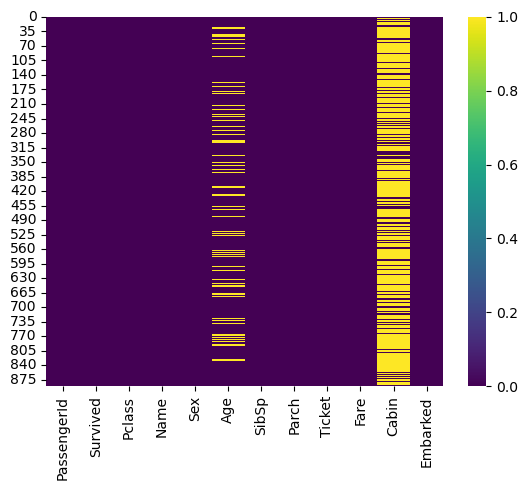

In [5]:
sns.heatmap(train.isnull(), cmap='viridis')

/tmp/ipykernel_99406/1555596437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

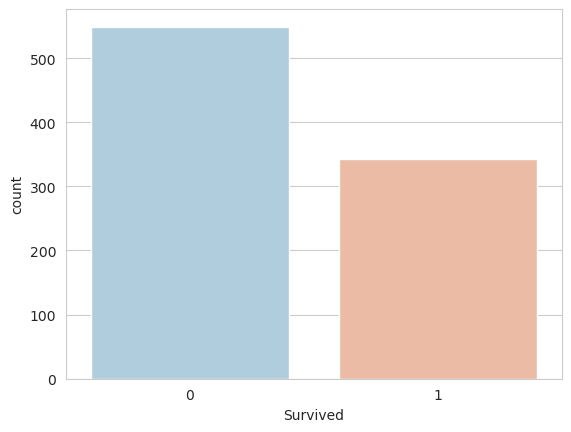

In [ ]:
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

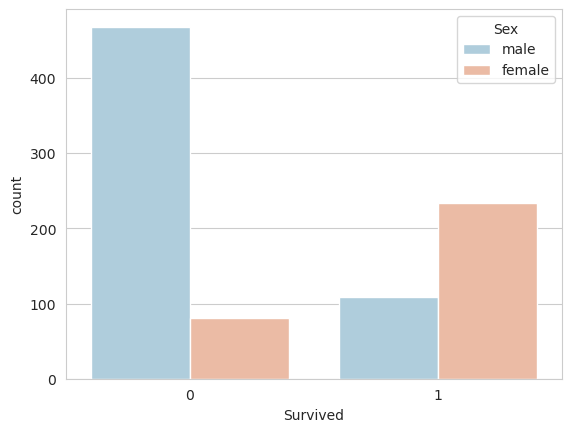

In [8]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

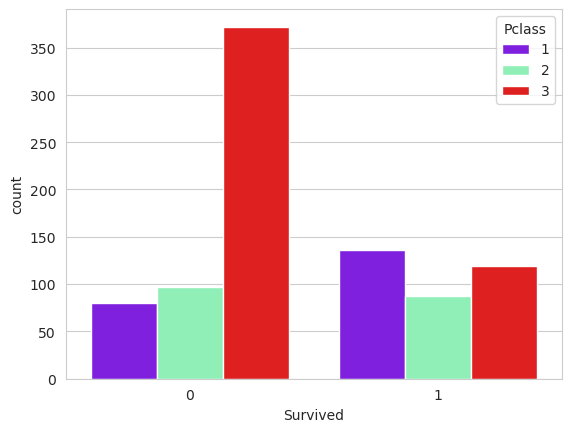

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

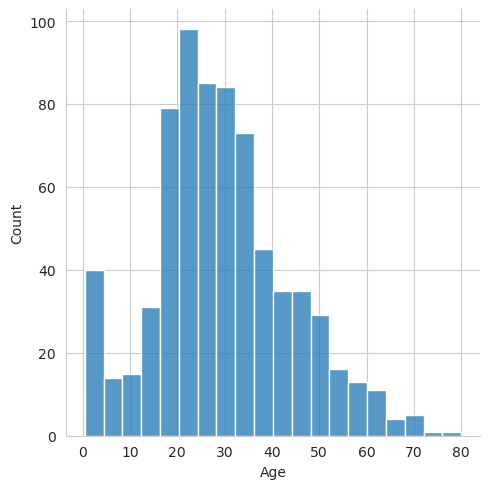

In [10]:
sns.displot(train['Age'].dropna())

<Axes: xlabel='SibSp', ylabel='count'>

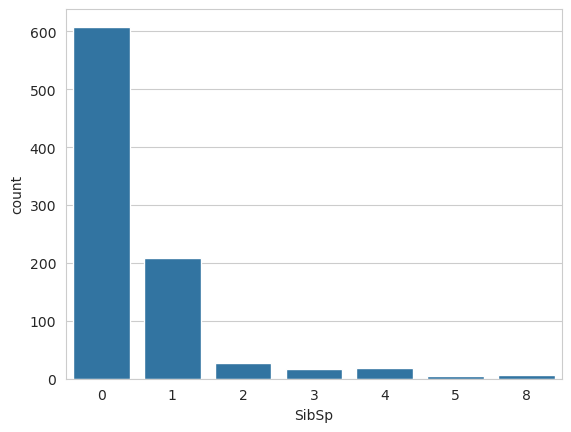

In [11]:
sns.countplot(x='SibSp',data=train)

/tmp/ipykernel_99406/1285741165.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

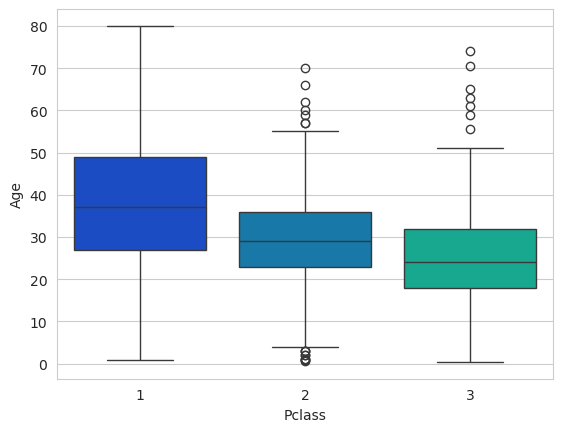

In [12]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [13]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age
    
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipykernel_99406/1611491482.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipykernel_99406/1611491482.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

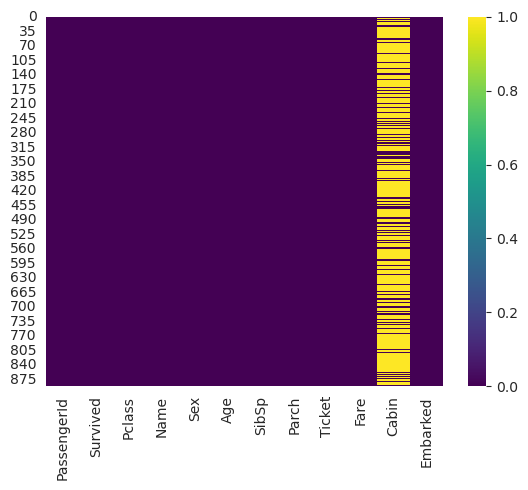

In [18]:
sns.heatmap(train.isnull(),cmap='viridis')

In [19]:
train.drop('Cabin',axis=1,inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
train.dropna(inplace=True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [23]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [28]:
from sklearn.model_selection import train_test_split

X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


In [31]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']


scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

X_train_cat = X_train.drop(columns=num_cols).values
X_test_cat = X_test.drop(columns=num_cols).values

X_train_scaled = np.hstack([X_train_num, X_train_cat])
X_test_scaled = np.hstack([X_test_num, X_test_cat])


models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True)
}


for name, model in models.items():
    print(f"--- مدل: {name} ---")
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"دقت: {acc:.4f}")
    print(classification_report(y_test, preds))
    print("\n")

--- مدل: Logistic Regression ---
دقت: 0.8163
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       174
           1       0.84      0.68      0.75       120

    accuracy                           0.82       294
   macro avg       0.82      0.80      0.80       294
weighted avg       0.82      0.82      0.81       294



--- مدل: Random Forest ---
دقت: 0.7993
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       174
           1       0.79      0.69      0.74       120

    accuracy                           0.80       294
   macro avg       0.80      0.78      0.79       294
weighted avg       0.80      0.80      0.80       294



--- مدل: Gradient Boosting ---
دقت: 0.8231
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       174
           1       0.84      0.70      0.76       120

    accuracy                           0.82       2

In [35]:
model = SVC(kernel='rbf', probability=True)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
print(classification_report(y_test, pred))
print(accuracy_score(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       174
           1       0.87      0.69      0.77       120

    accuracy                           0.83       294
   macro avg       0.84      0.81      0.82       294
weighted avg       0.84      0.83      0.83       294

0.8333333333333334
